# Symbolic Aggregate approXimation *(SAX)* Encoding

In [1]:
#Uncomment the following line to install the pynuTS package

#!pip install git+https://github.com/nickprock/pynuTS.git@main

In [2]:
# allow import from parent directory 
# (this is useful if running the demo from inside the pynuTS package tree)

import sys,os
sys.path.append(os.getcwd() + '/..')

In [3]:
import pandas as pd
import numpy as np
from pynuTS.decomposition import NaiveSAX

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

Symbolic Aggregate approXimation Encoding (SAX Encoding)

* Developed in 2002 by Keogh e Lin
* Dimensionality Reduction for sequences

* In this example we will use it to find anomaly patterns. For more informations read this [KDNuggets article](https://www.kdnuggets.com/2019/09/time-series-baseball.html).

## Create dataset.

We Create 10 sequences with 12 observations.


In [5]:
# Some useful functions
def sigmoid(x, a, b, c):
    expo = a * (b - x)
    sig = 1 / ( 1 + np.exp( expo ) ) * c
    return sig


def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [6]:
time = np.arange(12)

np.random.seed(42)
a = 0.5
b = 10
c = 20

list_series = []
for i in range(9):
  noise = white_noise(time)
  temp = sigmoid(time, a, b, c) + noise
  list_series.append(temp)

noise = white_noise(time)
temp = sigmoid(time, -a, b, c) + noise
list_series.append(temp)

### Create DataFrame

* every row is a period
* every column is a sequence

In [7]:
X = pd.DataFrame(list_series)

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.902838,-0.643857,-0.064501,0.108869,0.727670,1.840317,1.424092,4.456865,6.676526,7.132027,10.218817,11.966445
1,0.722339,-0.058084,0.752659,0.783204,1.685977,-0.215963,1.837097,2.945729,4.361751,6.644380,9.533906,12.210623
2,1.095591,1.377808,1.944265,0.830246,-0.424483,2.886524,4.410198,4.727225,4.369983,5.563119,8.757048,11.263230
3,1.716228,0.496289,-0.421677,0.389354,0.108980,3.194858,1.142033,2.043375,5.439153,7.930690,10.323249,13.103726
4,-1.195608,-1.159716,0.486786,-0.129707,1.400361,2.846932,3.821861,3.994582,5.267226,6.041442,11.241760,12.679046
5,0.147378,2.148651,1.388059,0.102566,-0.551900,2.389278,2.118256,3.479426,5.268870,6.590299,10.080128,12.126534
6,-0.650698,-0.552656,-0.353651,1.570195,0.484193,0.607460,1.828207,3.471601,5.577642,6.155500,10.000044,12.326833
7,0.188703,-0.884407,0.211383,0.913261,1.027563,2.458195,3.898552,3.283388,5.484820,5.027920,9.613359,12.942405
8,0.428516,0.308669,0.943817,-0.614235,2.430646,0.827119,-0.127430,4.614440,5.788237,8.691393,8.691388,10.984018
9,20.038773,20.099952,21.211660,17.693915,18.594405,17.371192,17.708520,13.763150,15.290024,12.201371,9.364662,6.540588


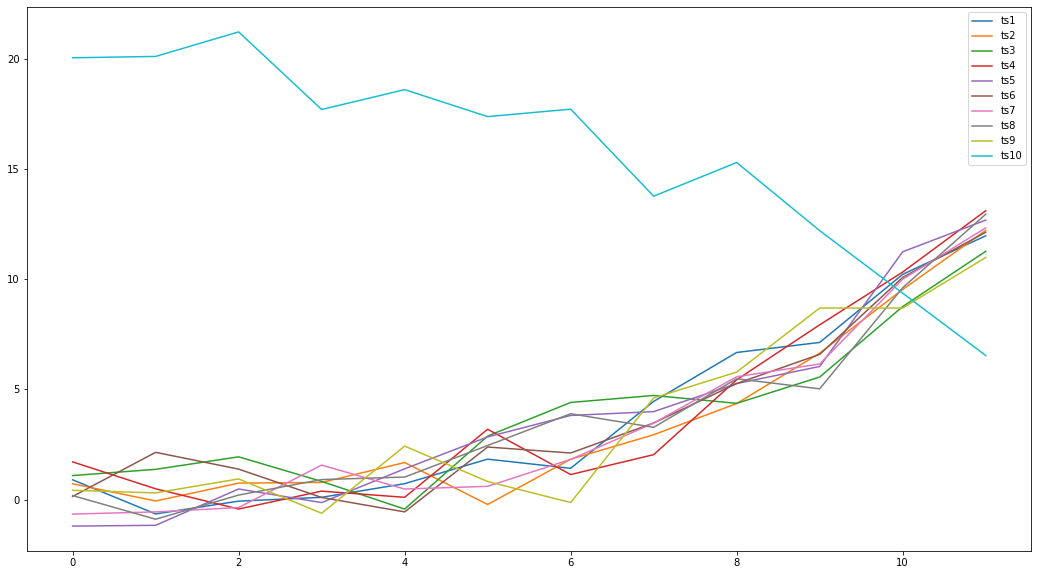

In [9]:
X.T.plot(figsize=(18,10))
plt.legend(["ts1", "ts2","ts3","ts4","ts5","ts6","ts7","ts8","ts9","ts10"])
plt.show()

## Anomaly detection with SAX Encoding

We choose a window size 4. We reduct the 12 periods in 3 periods, like quarters in a year.

In [10]:
sax = NaiveSAX(windows=4)

In [11]:
sax_strings = np.apply_along_axis(sax.fit_transform, 1, X)

## Dimensionality Reduction with **Piecewise Aggregate Approximation**

The **Piecewise Aggregate Approximation** is a sequence of labels, like 'AAA' in this case.

In [12]:
sax_strings

array(['ABC', 'ABC', 'ABC', 'ABC', 'ABC', 'ABC', 'ABC', 'ABC', 'ABC',
       'CBA'], dtype='<U3')

We create a new column and we count the occorrence

In [13]:
X["sax_strings"]=sax_strings

In [14]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,sax_strings
0,0.902838,-0.643857,-0.064501,0.108869,0.727670,1.840317,1.424092,4.456865,6.676526,7.132027,10.218817,11.966445,ABC
1,0.722339,-0.058084,0.752659,0.783204,1.685977,-0.215963,1.837097,2.945729,4.361751,6.644380,9.533906,12.210623,ABC
2,1.095591,1.377808,1.944265,0.830246,-0.424483,2.886524,4.410198,4.727225,4.369983,5.563119,8.757048,11.263230,ABC
3,1.716228,0.496289,-0.421677,0.389354,0.108980,3.194858,1.142033,2.043375,5.439153,7.930690,10.323249,13.103726,ABC
4,-1.195608,-1.159716,0.486786,-0.129707,1.400361,2.846932,3.821861,3.994582,5.267226,6.041442,11.241760,12.679046,ABC
5,0.147378,2.148651,1.388059,0.102566,-0.551900,2.389278,2.118256,3.479426,5.268870,6.590299,10.080128,12.126534,ABC
6,-0.650698,-0.552656,-0.353651,1.570195,0.484193,0.607460,1.828207,3.471601,5.577642,6.155500,10.000044,12.326833,ABC
7,0.188703,-0.884407,0.211383,0.913261,1.027563,2.458195,3.898552,3.283388,5.484820,5.027920,9.613359,12.942405,ABC
8,0.428516,0.308669,0.943817,-0.614235,2.430646,0.827119,-0.127430,4.614440,5.788237,8.691393,8.691388,10.984018,ABC
9,20.038773,20.099952,21.211660,17.693915,18.594405,17.371192,17.708520,13.763150,15.290024,12.201371,9.364662,6.540588,CBA


In [15]:
count = X.sax_strings.value_counts().reset_index()

Now we define when a time series is an anomaly. In this example an anomaly is a time series with frequency 1.

In [16]:
anomaly_limit=1
X["anomaly"] = False
X.loc[X['sax_strings'].isin(count.loc[count['sax_strings']==anomaly_limit, 'index']),'anomaly']=True

### Plot the series

In blu the standard patterns

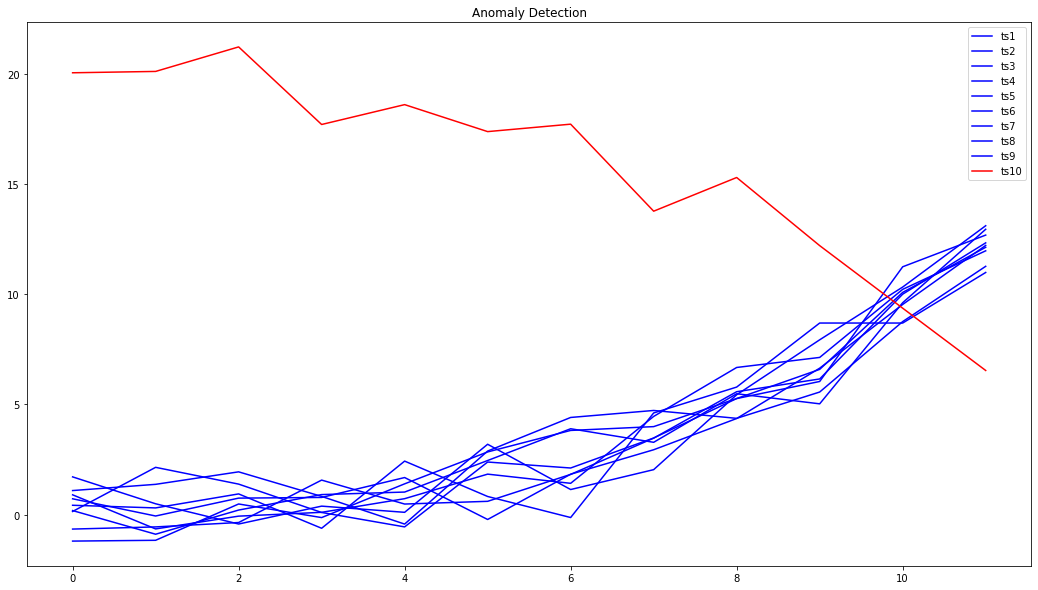

In [17]:
plt.figure(figsize=(18,10))
for i in range(X.shape[0]):
    if X.iloc[i,-1]:
        col = 'r'
    else:
        col = 'b'
    plt.plot(X.iloc[i,:-2], col)
plt.legend(["ts1", "ts2","ts3","ts4","ts5","ts6","ts7","ts8","ts9","ts10"])
plt.title("Anomaly Detection")
plt.show()

## Credits

pynuTS by Nicola Procopio 2020

Original repository https://github.com/nickprock/pynuTS/

<br>

* *The **sigmoid** function was created by [Piero Savastano](https://github.com/pieroit) for [covid19italia](https://github.com/ondata/covid19italia/blob/master/visualizzazione/analisi_predittiva.ipynb)*

* *The **white_noise** function was created by [Aurélien Géron](https://github.com/ageron) for an Udacity course*
